In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

In [50]:
df = pd.read_csv('./Dataset/Telco_Customer_Churn.csv')
print(df.shape)
df.head()

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [51]:
df.drop('customerID', axis=1, inplace=True)

In [52]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [53]:
# df.TotalCharges = df.TotalCharges.str.replace(' ', '')
# df.TotalCharges = pd.to_numeric(df.TotalCharges)
# df.TotalCharges.dtypes
pd.to_numeric(df.TotalCharges, errors='coerce').isnull()
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [54]:
df.iloc[488].TotalCharges

' '

In [55]:
df.drop(df[df.TotalCharges == ' '].index, inplace=True)

In [56]:
df.TotalCharges = pd.to_numeric(df.TotalCharges)

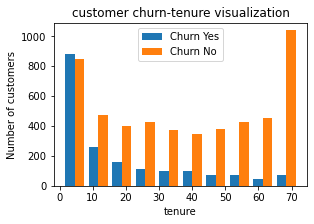

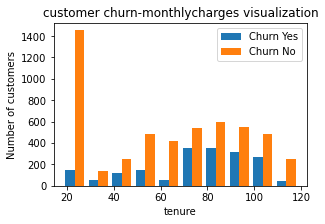

In [57]:
tenure_churn_yes = df[df.Churn == 'Yes'].tenure
tenure_churn_no = df[df.Churn == 'No'].tenure
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
plt.xlabel('tenure')
plt.ylabel('Number of customers')
plt.title('customer churn-tenure visualization')
plt.hist([tenure_churn_yes, tenure_churn_no], label=['Churn Yes', 'Churn No'])
plt.legend()
plt.show()
month_churn_yes = df[df.Churn == 'Yes'].MonthlyCharges
month_churn_no = df[df.Churn == 'No'].MonthlyCharges
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 2)
plt.xlabel('tenure')
plt.ylabel('Number of customers')
plt.title('customer churn-monthlycharges visualization')
plt.hist([month_churn_yes, month_churn_no], label=['Churn Yes', 'Churn No'])
plt.legend()
plt.show()

In [58]:
def unique_values_col(df):
    for column in df:
        if df[column].dtype == 'object':
            print(column, ":", df[column].unique())

In [59]:
unique_values_col(df)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [60]:
df.replace('No internet service', "No", inplace=True)
df.replace('No phone service', "No", inplace=True)
unique_values_col(df)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [61]:
for column in df:
    if df[column].isin(['Yes']).any().any() & df[column].isin(['No'
                                                               ]).any().any():
        #         yes_no_col.append(column)
        print(column, ":", df[column].unique())
        df[column].replace('No', 0, inplace=True)
        df[column].replace('Yes', 1, inplace=True)

Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
PaperlessBilling : ['Yes' 'No']
Churn : ['No' 'Yes']


In [62]:
df.gender.replace('Female', 1, inplace=True)
df.gender.replace('Male', 0, inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,1,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [63]:
unique_values_col(df)

InternetService : ['DSL' 'Fiber optic' 'No']
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [64]:
df1 = pd.get_dummies(data=df,
                     columns=['InternetService', 'Contract', 'PaymentMethod'])
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [65]:
df1.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [66]:
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

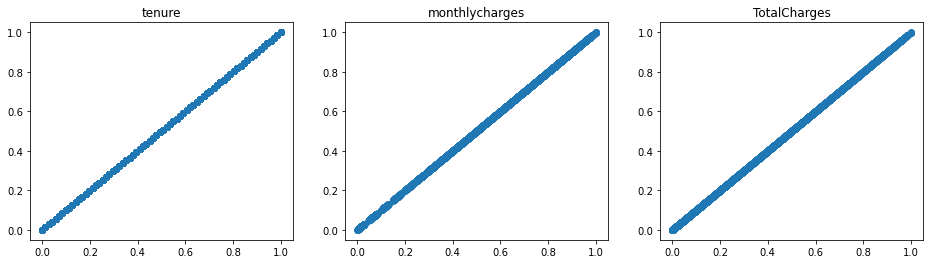

In [67]:
plt.figure(figsize=(16, 4))
plt.subplot(1, 3, 1)
plt.title('tenure')
plt.scatter(df1.tenure, df1.tenure)
plt.subplot(1, 3, 2)
plt.title('monthlycharges')
plt.scatter(df1.MonthlyCharges, df1.MonthlyCharges)
plt.subplot(1, 3, 3)
plt.title('TotalCharges')
plt.scatter(df1.TotalCharges, df1.TotalCharges)
plt.show()

In [68]:
min_th, max_th = df1['tenure'].quantile([0.01, 0.999])
print(min_th, max_th, df1[(df1.tenure < min_th) & (df1.tenure > max_th)].shape)
df1.drop(df1[(df1.tenure < min_th) & (df1.tenure > max_th)].index,
         inplace=True)

min_th, max_th = df1['MonthlyCharges'].quantile([0.01, 0.999])
print(min_th, max_th,
      df1[(df1.MonthlyCharges < min_th) & (df1.MonthlyCharges > max_th)].shape)
df1.drop(df1[(df1.MonthlyCharges < min_th)
             & (df1.MonthlyCharges > max_th)].index,
         inplace=True)

min_th, max_th = df1['TotalCharges'].quantile([0.01, 0.999])
print(min_th, max_th,
      df1[(df1.TotalCharges < min_th) & (df1.TotalCharges > max_th)].shape)
df1.drop(df1[(df1.TotalCharges < min_th) & (df1.TotalCharges > max_th)].index,
         inplace=True)

0.0 1.0 (0, 27)
0.009452736318407956 0.9885263681592048 (0, 27)
0.00012693284098776788 0.9819620586198975 (0, 27)


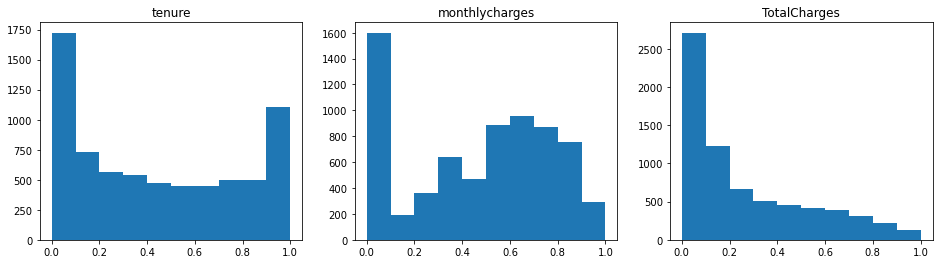

In [69]:
plt.figure(figsize=(16, 4))
plt.subplot(1, 3, 1)
plt.title('tenure')
plt.hist(df1.tenure)
plt.subplot(1, 3, 2)
plt.title('monthlycharges')
plt.hist(df1.MonthlyCharges)
plt.subplot(1, 3, 3)
plt.title('TotalCharges')
plt.hist(df1.TotalCharges)
plt.show()

In [70]:
X = df1.drop('Churn', axis='columns')
y = df1['Churn']
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=5)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5625, 26), (1407, 26), (5625,), (1407,))

In [71]:
model = keras.Sequential()

#Input Layer
model.add(keras.layers.Dense(X.shape[1], activation='relu',
                             input_shape=(26, )))

#Hidden Layer
# model.add(keras.layers.Dense(26, activation='relu'))
model.add(keras.layers.Dense(15, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

#Output Layer
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 26)                702       
_________________________________________________________________
dense_13 (Dense)             (None, 15)                405       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 16        
Total params: 1,123
Trainable params: 1,123
Non-trainable params: 0
_________________________________________________________________


In [72]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 3ms/step - loss: 0.5696 - accuracy: 0.7248
Epoch 2/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4241 - accuracy: 0.7945
Epoch 3/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4212 - accuracy: 0.8001
Epoch 4/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4177 - accuracy: 0.8025
Epoch 5/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4088 - accuracy: 0.8049
Epoch 6/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4035 - accuracy: 0.8097
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4010 - accuracy: 0.8106
Epoch 8/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4100 - accuracy: 0.7984
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3998 - accuracy: 0.8165
Epoch 10/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4114 - accura

176/176 [==============================] - 0s 3ms/step - loss: 0.3642 - accuracy: 0.8321
Epoch 82/100
176/176 [==============================] - 0s 3ms/step - loss: 0.3574 - accuracy: 0.8318
Epoch 83/100
176/176 [==============================] - 0s 3ms/step - loss: 0.3437 - accuracy: 0.8390
Epoch 84/100
176/176 [==============================] - 0s 3ms/step - loss: 0.3412 - accuracy: 0.8405
Epoch 85/100
176/176 [==============================] - 0s 3ms/step - loss: 0.3468 - accuracy: 0.8375
Epoch 86/100
176/176 [==============================] - 0s 3ms/step - loss: 0.3575 - accuracy: 0.8351
Epoch 87/100
176/176 [==============================] - 0s 3ms/step - loss: 0.3657 - accuracy: 0.8294
Epoch 88/100
176/176 [==============================] - 0s 3ms/step - loss: 0.3455 - accuracy: 0.8418
Epoch 89/100
176/176 [==============================] - 0s 3ms/step - loss: 0.3635 - accuracy: 0.8282
Epoch 90/100
176/176 [==============================] - 0s 3ms/step - loss: 0.3535 - accuracy: 

<Figure size 720x432 with 0 Axes>

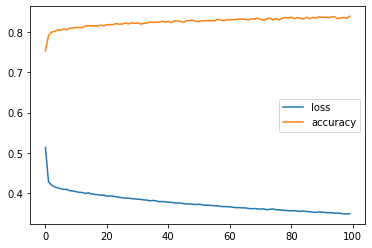

In [73]:
plt.figure(figsize=(10, 6))
pd.DataFrame(model.history.history).plot()
plt.show()

In [74]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.4918 - accuracy: 0.7690


[0.49182459712028503, 0.7690120935440063]

In [75]:
y_predr = np.rint(model.predict(X_test))

In [76]:
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve

In [77]:
classifier = svm.SVC(kernel='linear', gamma='auto', C=2)
classifier.fit(X_train, y_train)

SVC(C=2, gamma='auto', kernel='linear')

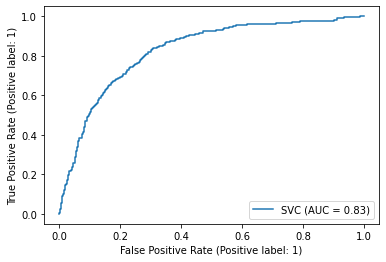

In [78]:
prd = classifier.predict(X_test)
plot_roc_curve(classifier, X_test, y_test)

In [79]:
classifier.score(X_test, y_test)

0.7860696517412935

In [80]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

LogisticRegression()

In [81]:
y_pred = logisticRegr.predict(X_test)

In [82]:
logisticRegr.score(X_test, y_test)

0.7945984363894811

In [83]:
from sklearn.metrics import confusion_matrix, classification_report

In [84]:
print(classification_report(y_test, y_predr))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       999
           1       0.62      0.52      0.57       408

    accuracy                           0.77      1407
   macro avg       0.72      0.70      0.70      1407
weighted avg       0.76      0.77      0.76      1407



tf.Tensor(
[[870 129]
 [196 212]], shape=(2, 2), dtype=int32)

 Acc : 0.7839374555792467


Text(69.0, 0.5, 'Truth')

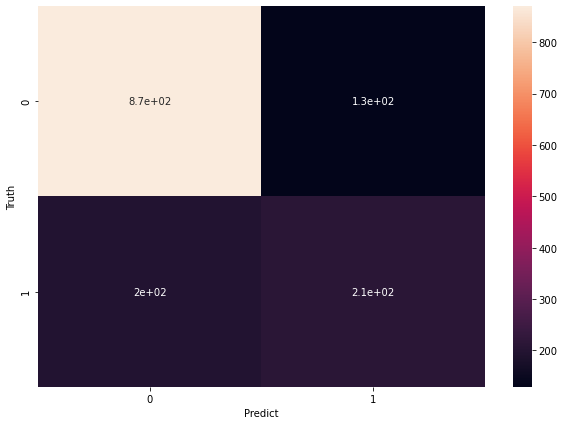

In [85]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predr)
print(cm)
print('\n Acc :', (898 + 205) / (898 + 205 + 203 + 101))
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predict')
plt.ylabel('Truth')

# Handling imbalanced data

In [86]:
def model_fit(X_train1, y_train1, X_test1, y_test1, cls_weight):
    model1 = keras.Sequential()

    #Input Layer
    model1.add(
        keras.layers.Dense(X.shape[1], activation='relu', input_dim=26))

    #Hidden Layer
    # model.add(keras.layers.Dense(26, activation='relu'))
    model1.add(keras.layers.Dense(15, activation='relu'))
    model1.add(keras.layers.Dense(1, activation='sigmoid'))

    #Output Layer
    model1.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])
    
    #fit
    if cls_weight == -1:
        model1.fit(X_train, y_train, epochs=100)
    else:
        model1.fit(X_train1, y_train1, epochs=100, class_weight=cls_weight)
        
    y_preds = model1.predict(X_test1)
    y_preds = np.round(y_preds)
    print(model1.evaluate(X_test1, y_test1))
    print("Classification Report: \n", classification_report(y_test1, y_preds))
    
    return y_preds

In [87]:
count_class_0, count_class_1 = df1.Churn.value_counts()
df_class_0 = df1[df1['Churn'] == 0]
df_class_1 = df1[df1['Churn'] == 1]
df_class_0.shape, df_class_1.shape, count_class_0, count_class_1

((5163, 27), (1869, 27), 5163, 1869)

In [88]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)
df_test_under.Churn.value_counts()

1    1869
0    1869
Name: Churn, dtype: int64

In [89]:
X = df_test_under.drop('Churn', axis='columns')
y = df_test_under['Churn']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X,
                                                        y,
                                                        test_size=0.2,
                                                        random_state=15,
                                                        stratify=y)
X_train1.shape, X_test1.shape, y_train1.shape, y_test1.shape

((2990, 26), (748, 26), (2990,), (748,))

In [90]:
y_preds = model_fit(X_train1, y_train1, X_test1, y_test1, -1)

Epoch 1/100
176/176 [==============================] - 2s 3ms/step - loss: 0.5427 - accuracy: 0.7343
Epoch 2/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4386 - accuracy: 0.7876
Epoch 3/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4189 - accuracy: 0.8019
Epoch 4/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4030 - accuracy: 0.8094
Epoch 5/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4049 - accuracy: 0.8087
Epoch 6/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4103 - accuracy: 0.8049
Epoch 7/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4197 - accuracy: 0.7959
Epoch 8/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4139 - accuracy: 0.7983
Epoch 9/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4071 - accuracy: 0.8117
Epoch 10/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3991 - accura

176/176 [==============================] - 1s 3ms/step - loss: 0.3482 - accuracy: 0.8355
Epoch 82/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3588 - accuracy: 0.8324
Epoch 83/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3550 - accuracy: 0.8338
Epoch 84/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3549 - accuracy: 0.8354
Epoch 85/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3442 - accuracy: 0.8380
Epoch 86/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3446 - accuracy: 0.8436
Epoch 87/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3515 - accuracy: 0.8353
Epoch 88/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3505 - accuracy: 0.8369
Epoch 89/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3579 - accuracy: 0.8347
Epoch 90/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3425 - accuracy: 

## Method : 2

In [91]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)

df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)
df_test_over.Churn.value_counts()

1    5163
0    5163
Name: Churn, dtype: int64

In [92]:
X = df_test_over.drop('Churn', axis='columns')
y = df_test_over['Churn']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X,
                                                        y,
                                                        test_size=0.2,
                                                        random_state=15,
                                                        stratify=y)
X_train2.shape, X_test2.shape, y_train2.shape, y_test2.shape

((8260, 26), (2066, 26), (8260,), (2066,))

In [93]:
y_pred_over = model_fit(X_train2, y_train2, X_test2, y_test2, -1)

Epoch 1/100
176/176 [==============================] - 1s 3ms/step - loss: 0.6398 - accuracy: 0.5920
Epoch 2/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4411 - accuracy: 0.7914
Epoch 3/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4290 - accuracy: 0.7971
Epoch 4/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4277 - accuracy: 0.7984
Epoch 5/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4223 - accuracy: 0.7984
Epoch 6/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3992 - accuracy: 0.8075
Epoch 7/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4145 - accuracy: 0.8011
Epoch 8/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4127 - accuracy: 0.8046
Epoch 9/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4100 - accuracy: 0.8065
Epoch 10/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4098 - accura

176/176 [==============================] - 1s 4ms/step - loss: 0.3593 - accuracy: 0.8388
Epoch 82/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3426 - accuracy: 0.8435
Epoch 83/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3424 - accuracy: 0.8428
Epoch 84/100
176/176 [==============================] - 0s 3ms/step - loss: 0.3442 - accuracy: 0.8467
Epoch 85/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3444 - accuracy: 0.8425
Epoch 86/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3537 - accuracy: 0.8421
Epoch 87/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3521 - accuracy: 0.8429
Epoch 88/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3507 - accuracy: 0.8412
Epoch 89/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3637 - accuracy: 0.8293
Epoch 90/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3448 - accuracy: 

## Method : 2 (SMOTE)

In [158]:
X = df1.drop('Churn',axis='columns')
y = df1['Churn']

In [159]:
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

In [160]:
y.value_counts(), y_sm.value_counts(), X_sm.shape, y_sm.shape

(0    5163
 1    1869
 Name: Churn, dtype: int64,
 1    5163
 0    5163
 Name: Churn, dtype: int64,
 (10326, 26),
 (10326,))

In [161]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X_sm,
                                                        y_sm,
                                                        test_size=0.2,
                                                        random_state=15,
                                                        stratify=y_sm)
X_train4.shape, X_test4.shape, y_train4.shape, y_test4.shape

((8260, 26), (2066, 26), (8260,), (2066,))

In [156]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [157]:
y_pred_smote = ANN(X_train4, y_train4, X_test4, y_test4, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 3s 8ms/step - loss: 0.6204 - accuracy: 0.6599
Epoch 2/100
259/259 [==============================] - 4s 14ms/step - loss: 0.4907 - accuracy: 0.7640 3s - loss: 0.5
Epoch 3/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4684 - accuracy: 0.7785
Epoch 4/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4675 - accuracy: 0.7756
Epoch 5/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4438 - accuracy: 0.7927
Epoch 6/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4386 - accuracy: 0.7918
Epoch 7/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4380 - accuracy: 0.7929
Epoch 8/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4387 - accuracy: 0.7964
Epoch 9/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4296 - accuracy: 0.8009
Epoch 10/100
259/259 [==============================] - 1s 2ms/step - loss:

259/259 [==============================] - 1s 2ms/step - loss: 0.3384 - accuracy: 0.8535
Epoch 81/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3404 - accuracy: 0.8471
Epoch 82/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3331 - accuracy: 0.8570
Epoch 83/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3432 - accuracy: 0.8535
Epoch 84/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3436 - accuracy: 0.8508
Epoch 85/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3364 - accuracy: 0.8592
Epoch 86/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3491 - accuracy: 0.8515
Epoch 87/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3378 - accuracy: 0.8556
Epoch 88/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3413 - accuracy: 0.8551
Epoch 89/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3484 - accuracy: 

# Ensemble

In [162]:
X = df1.drop('Churn',axis='columns')
y = df1['Churn']

In [163]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X,
                                                        y,
                                                        test_size=0.2,
                                                        random_state=15,
                                                        stratify=y)
X_train4.shape, X_test4.shape, y_train4.shape, y_test4.shape

((5625, 26), (1407, 26), (5625,), (1407,))